In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
data.shape

(6607, 20)

In [5]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

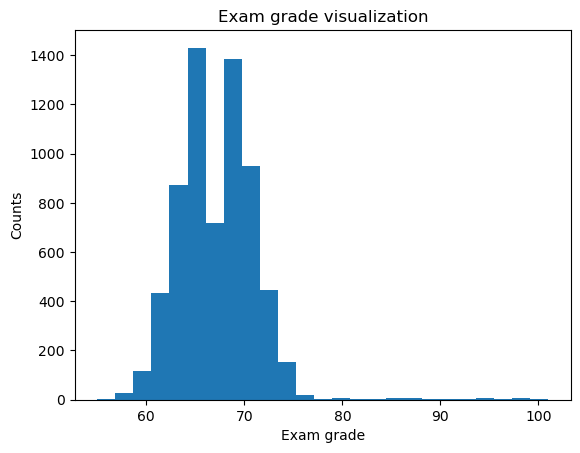

In [7]:
data["Exam_Score"].plot(
    kind="hist",
    bins=25
)

plt.title("Exam grade visualization")
plt.xlabel("Exam grade")
plt.ylabel("Counts")
plt.show()

In [8]:
print("Grade range:", data["Exam_Score"].min(), "-", data["Exam_Score"].max())
print("Missing values count:", data["Exam_Score"].isna().sum())

Grade range: 55 - 101
Missing values count: 0


In [9]:
data[data["Exam_Score"] == 101] ## Everything other than the exam score seems normal

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [10]:
data.loc[data["Exam_Score"] == 101, "Exam_Score"] = 100

In [11]:
print("Max grade after changes:", data["Exam_Score"].max())

Max grade after changes: 100


In [12]:
data.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [13]:
data = data.dropna()

In [14]:
data.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [15]:
data.shape

(6378, 20)

In [16]:
data.drop_duplicates()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [17]:
for col in data.columns: # Check for any outliers and spelling errors
    print(f"Column {col}")
    print(data[col].value_counts(dropna=False))
    print("-"*40)
    

Column Hours_Studied
Hours_Studied
20    448
19    425
21    420
18    393
23    389
22    386
17    370
24    343
16    337
15    303
25    281
14    257
26    255
27    217
13    213
12    189
28    169
11    140
29    131
30    119
10     91
9      79
31     75
8      55
32     54
7      51
33     37
34     27
5      21
35     20
6      17
4      16
3      12
36     10
38      7
39      6
37      6
2       4
1       3
43      1
44      1
Name: count, dtype: int64
----------------------------------------
Column Attendance
Attendance
67     182
76     179
98     178
77     177
64     176
94     175
91     169
84     169
79     169
69     166
68     166
82     165
96     164
80     163
93     163
73     162
81     161
72     160
95     160
74     159
78     158
89     157
61     155
63     153
88     153
97     153
83     152
65     152
90     151
92     150
99     150
71     150
86     149
70     148
87     148
62     146
75     144
85     142
66     140
60      85
100     79
Name: co

In [18]:
# Correlation matrix
corr = data.corr(numeric_only=True)

# Focus on correlation with final_grade
print(corr['Exam_Score'].sort_values(ascending=False))

Exam_Score           1.000000
Attendance           0.580394
Hours_Studied        0.445209
Previous_Scores      0.174292
Tutoring_Sessions    0.156769
Physical_Activity    0.025155
Sleep_Hours         -0.017149
Name: Exam_Score, dtype: float64


In [19]:
data_dummies_eval = pd.get_dummies(data) # Needs to be used
corr_values = data_dummies_eval.corr()['Exam_Score'].sort_values(ascending=False)

# Filter only values greater than 0.02
filtered_corr = corr_values[abs(corr_values) < 0.02]

print(filtered_corr)

Parental_Education_Level_College    0.017985
School_Type_Private                 0.010898
Gender_Female                       0.004887
Gender_Male                        -0.004887
Peer_Influence_Neutral             -0.007443
School_Type_Public                 -0.010898
Sleep_Hours                        -0.017149
Name: Exam_Score, dtype: float64


In [55]:
def get_dummies(data):
    data_dummies = pd.get_dummies(data, drop_first=True) 
    
    X = data_dummies.drop(columns=["Exam_Score"])
    y = data_dummies["Exam_Score"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [21]:
def MSE(y_target, y_pred):
    return np.mean((y_target - y_pred)**2)

def RMSE(y_target, y_pred):
    return np.sqrt(MSE(y_target, y_pred))

In [22]:
def get_best_alpha(model,X,y,alphas):
    kf = KFold(n_splits=3, random_state = 0, shuffle=True)
    results = []
    for alpha in alphas:
        model.set_params(alpha=alpha)
        for train_indexes, val_indexes in kf.split(X):
            X_train, X_val = X.values[train_indexes], X.values[val_indexes]
            y_train, y_val = y.values[train_indexes], y.values[val_indexes]

            model.fit(X_train, y_train)
            rmse = RMSE(y_val,model.predict(X_val))
            results.append((alpha, rmse))
   

    best_alpha, rmse = sorted(results, key=lambda x: x[1])[0]
    return best_alpha, rmse

In [23]:
def get_best_random_forest(X, y):
    param_grid = {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }

    rf = RandomForestRegressor(random_state=5)

    grid = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=3,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )

    grid.fit(X, y)
    print(grid.best_params_)

    return grid.best_estimator_

In [ ]:
def run_models(X_train, X_test, y_train, y_test):

    ridge_alphas = np.linspace(0.1, 10, 100)
    lasso_alphas = np.linspace(0.001, 5, 100)
    
    ridge_best_alpha, rmse = get_best_alpha(lm.Ridge(), X_train, y_train, ridge_alphas)
    lasso_best_alpha, rmse = get_best_alpha(lm.Lasso(), X_train, y_train, lasso_alphas)

    #rf_best_model= get_best_random_forest(X_train, y_train)
    
    models = {
        "Linear": lm.LinearRegression(),
        "Ridge": lm.Ridge(alpha=ridge_best_alpha),
        "Lasso": lm.Lasso(alpha=lasso_best_alpha),
        "RandomForest": RandomForestRegressor(random_state=5) #rf_best_model,
    }
    
    results = []
    
    for name, model in models.items():

        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        results.append({
            "Model": name,
            "y_train_pred": y_train_pred,
            "y_test_pred": y_test_pred
        })

    return (models, results)


In [38]:
def find_scores(y_train, y_test, results):

    scores = []
    for res in results:
        model_name = res["Model"]
        y_train_pred = res["y_train_pred"]
        y_test_pred = res["y_test_pred"]
        
        train_rmse = RMSE(y_train, y_train_pred)
        test_rmse = RMSE(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        scores.append({
                "Model": model_name,
                "Train RMSE": round(train_rmse, 3),
                "Test RMSE": round(test_rmse, 3),
                "Train R2": round(train_r2, 3),
                "Test R2": round(test_r2, 3)
            })
    
    scores_df = pd.DataFrame(scores)
    print(scores_df)
    return scores

In [69]:
def analysis(y_true, y_pred, data_type, model_name="Model"):

    # Predicted vs Actual    
    plt.scatter(y_pred, y_true, alpha=0.7)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             'r--')  # diagonal line
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} : Predicted vs Actual")
    
    plt.show()

In [71]:
X_train, X_test, y_train, y_test = get_dummies(data)
models, results = run_models(X_train, X_test, y_train, y_test)

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [72]:
scores = find_scores(y_train, y_test, results)

          Model  Train RMSE  Test RMSE  Train R2  Test R2
0        Linear       2.058      2.089     0.723    0.717
1         Ridge       2.058      2.090     0.723    0.717
2         Lasso       2.058      2.090     0.723    0.717
3  RandomForest       1.758      2.460     0.798    0.608


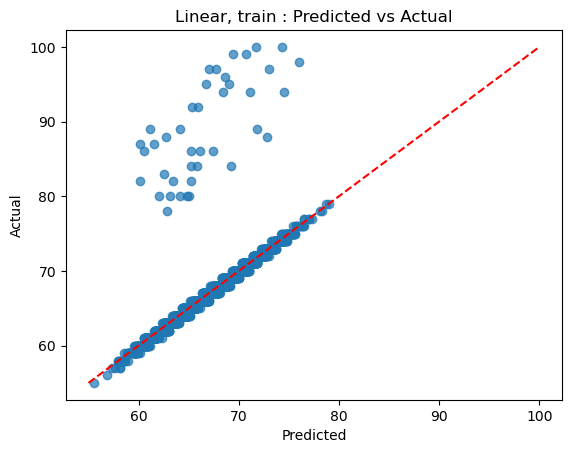

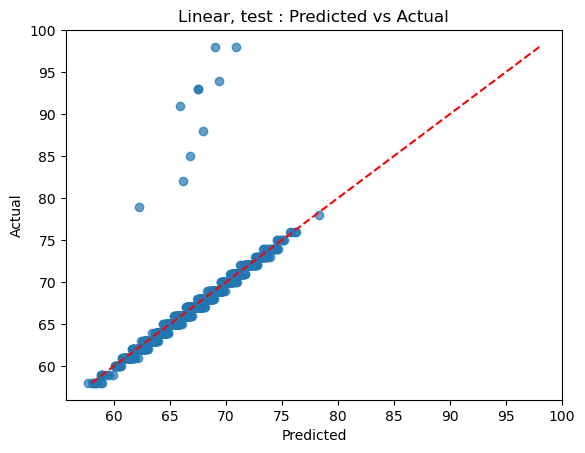

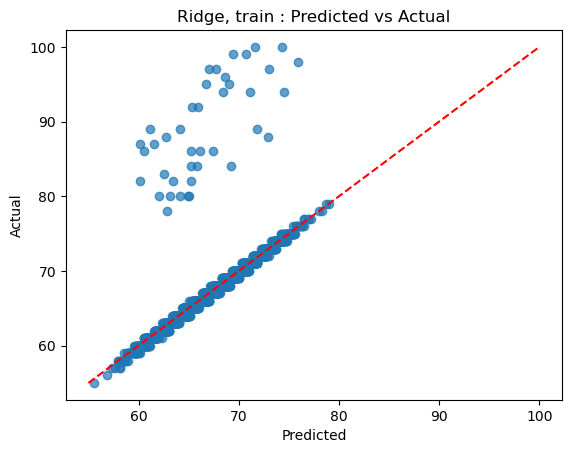

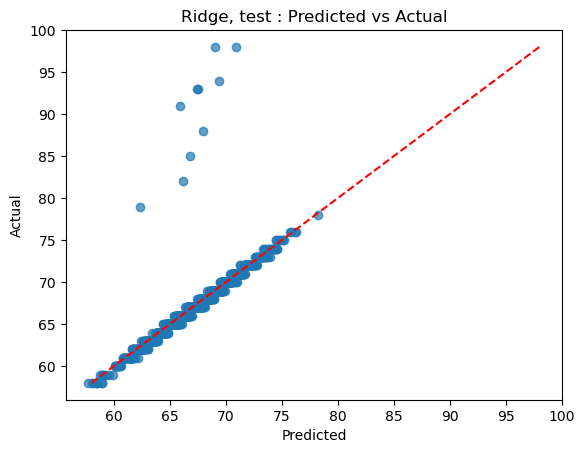

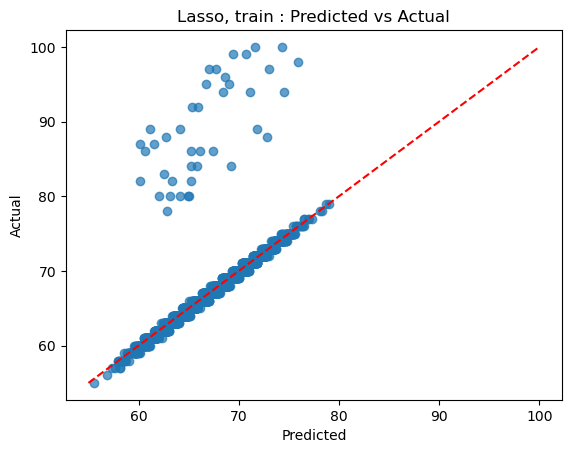

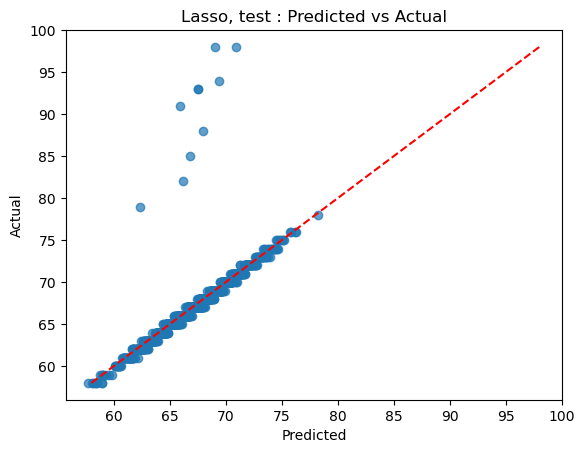

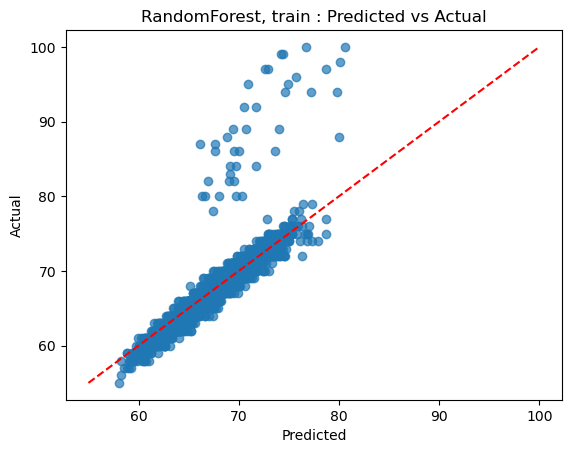

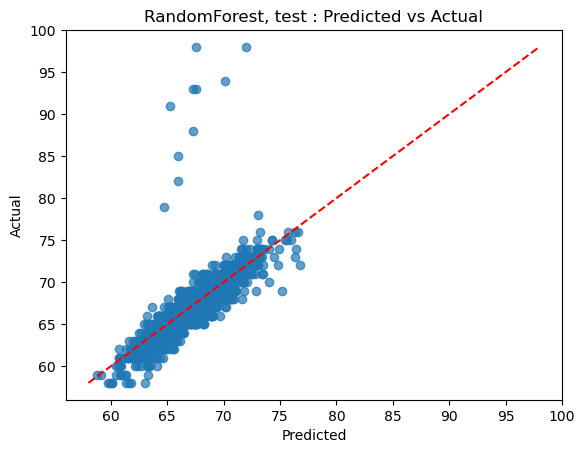

In [68]:
for res in results:
    analysis(y_train, res["y_train_pred"], "train", res["Model"])
    analysis(y_test, res["y_test_pred"], "test", res["Model"])

In [30]:
data_less_features = data.drop(columns=["Gender", "Sleep_Hours", "Internet_Access", "Teacher_Quality", "Distance_from_Home"])
X_train2, X_test2, y_train2, y_test2 = get_dummies(data_less_features)
models2, results2 = run_models(X_train2, X_test2, y_train2, y_test2)

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [31]:
scores = find_scores(y_train2, y_test2, results2)

          Model  Train RMSE  Test RMSE  Train R2  Test R2
0        Linear       2.119      2.158     0.706    0.698
1         Ridge       2.119      2.158     0.706    0.698
2         Lasso       2.119      2.158     0.706    0.698
3  RandomForest       1.777      2.456     0.793    0.609


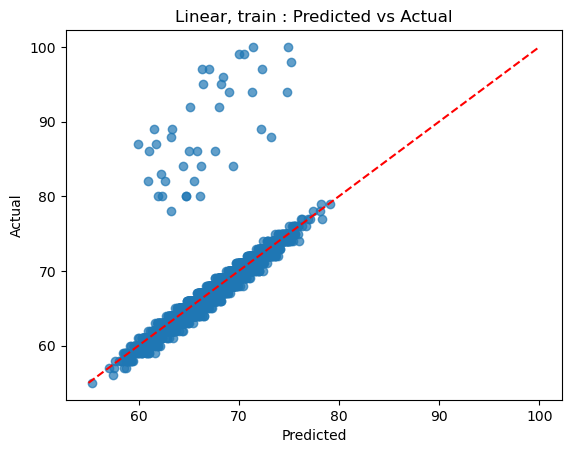

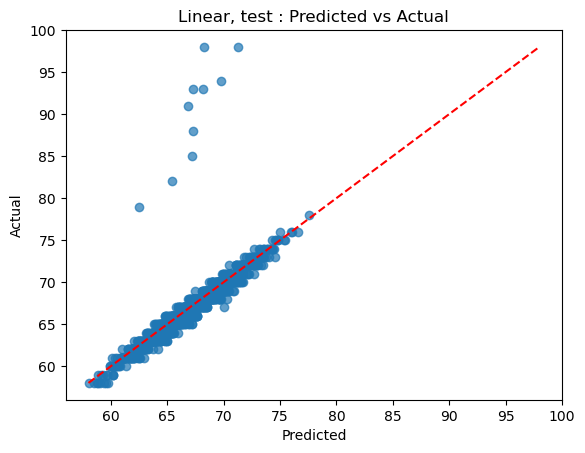

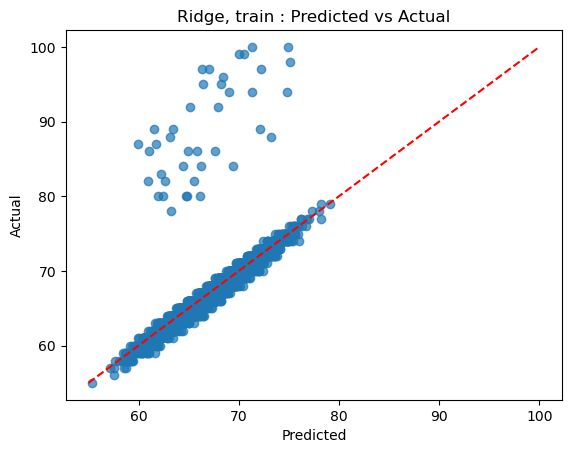

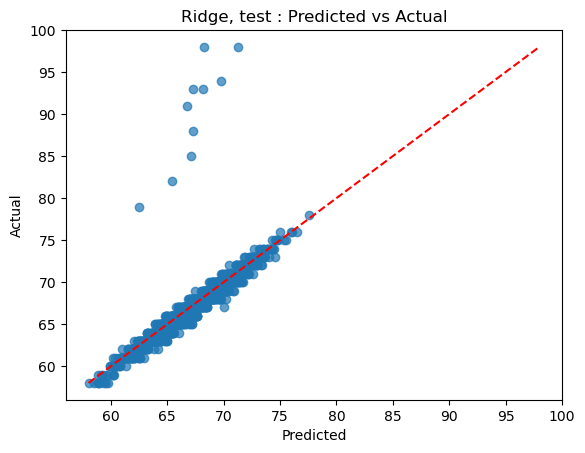

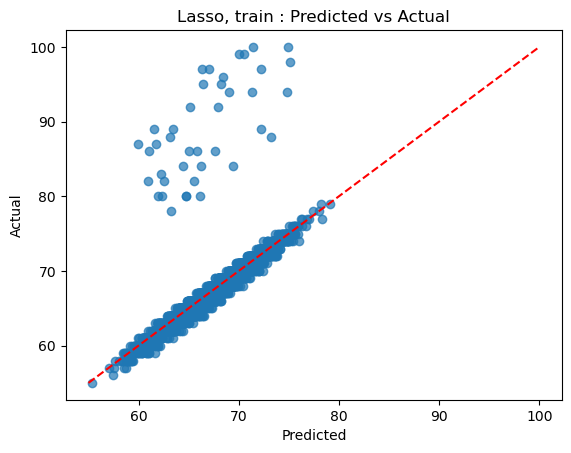

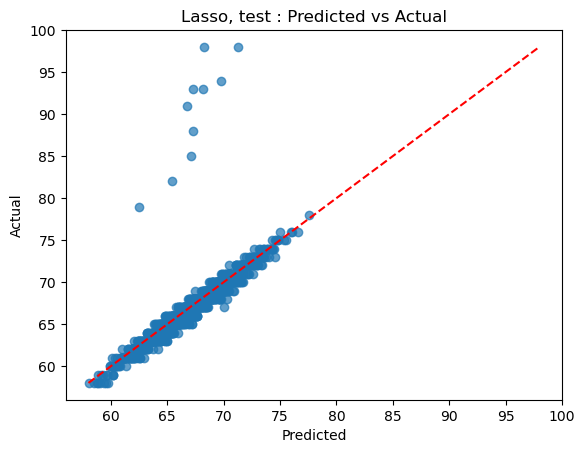

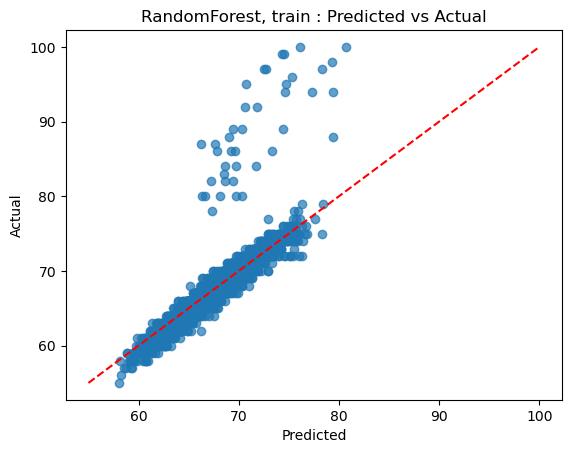

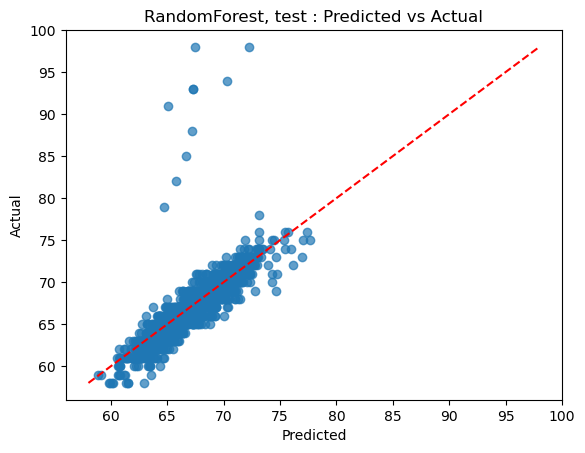

In [32]:
for res in results2:
    analysis(y_train2, res["y_train_pred"], "train", res["Model"])
    analysis(y_test2, res["y_test_pred"], "test", res["Model"])

In [33]:
coeffs = pd.Series(models["Linear"].coef_, index=X_train.columns).sort_values(ascending=False)

# print(coeffs)

In [57]:
coeffs = pd.Series(models["Ridge"].coef_, index=X_train.columns).sort_values(ascending=False)

print(coeffs)

Peer_Influence_Positive                  1.019151
Internet_Access_Yes                      0.898530
Distance_from_Home_Near                  0.860821
Extracurricular_Activities_Yes           0.605748
Peer_Influence_Neutral                   0.525186
Tutoring_Sessions                        0.506466
Parental_Education_Level_Postgraduate    0.451571
Distance_from_Home_Moderate              0.324026
Hours_Studied                            0.290920
Attendance                               0.198927
Physical_Activity                        0.179848
Previous_Scores                          0.048630
School_Type_Public                       0.007686
Gender_Male                             -0.026287
Sleep_Hours                             -0.027222
Parental_Education_Level_High School    -0.442894
Teacher_Quality_Medium                  -0.534019
Motivation_Level_Medium                 -0.535969
Family_Income_Medium                    -0.561372
Learning_Disabilities_Yes               -0.784402


In [44]:
coeffs = pd.Series(models["Lasso"].coef_, index=X_train.columns).sort_values(ascending=False)

print(coeffs)

Peer_Influence_Positive                  1.019762
Internet_Access_Yes                      0.901186
Distance_from_Home_Near                  0.856288
Extracurricular_Activities_Yes           0.605255
Peer_Influence_Neutral                   0.524028
Tutoring_Sessions                        0.506319
Parental_Education_Level_Postgraduate    0.449715
Distance_from_Home_Moderate              0.317321
Hours_Studied                            0.290906
Attendance                               0.198933
Physical_Activity                        0.179191
Previous_Scores                          0.048629
School_Type_Public                       0.003336
Gender_Male                             -0.022277
Sleep_Hours                             -0.026681
Parental_Education_Level_High School    -0.441987
Teacher_Quality_Medium                  -0.533800
Motivation_Level_Medium                 -0.536215
Family_Income_Medium                    -0.561070
Learning_Disabilities_Yes               -0.784823


In [45]:
importances = pd.Series(models2["RandomForest"].feature_importances_, index=X_train2.columns).sort_values(ascending=False)
print(importances)

Attendance                               0.459881
Hours_Studied                            0.282749
Previous_Scores                          0.085099
Tutoring_Sessions                        0.035801
Access_to_Resources_Low                  0.018794
Parental_Involvement_Low                 0.017061
Physical_Activity                        0.013883
Peer_Influence_Positive                  0.009542
Parental_Education_Level_High School     0.008945
Access_to_Resources_Medium               0.008846
Family_Income_Low                        0.008766
Parental_Involvement_Medium              0.008626
Extracurricular_Activities_Yes           0.006857
Motivation_Level_Low                     0.006742
Learning_Disabilities_Yes                0.006135
Parental_Education_Level_Postgraduate    0.005168
School_Type_Public                       0.005051
Family_Income_Medium                     0.004356
Motivation_Level_Medium                  0.003966
Peer_Influence_Neutral                   0.003735


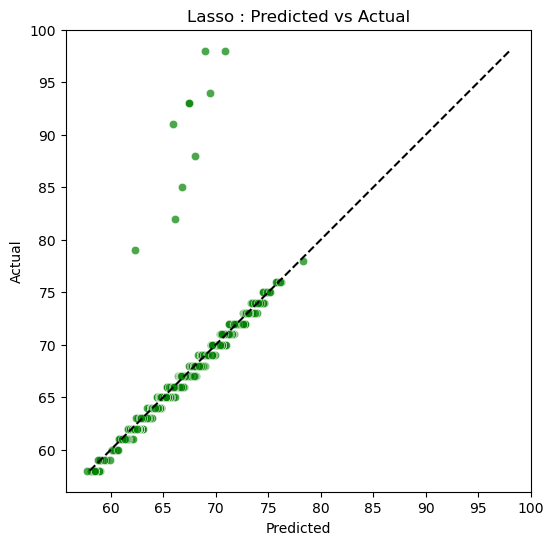

In [101]:
y_true = y_test
y_pred = results[2]["y_test_pred"]

df = pd.DataFrame({
    "Predicted": y_pred,
    "Actual": y_true
})

plt.figure(figsize=(6,6))

# Scatter plot with Seaborn
sns.scatterplot(data=df, x="Predicted", y="Actual", color="green", alpha=0.7)

# Add diagonal line (perfect prediction)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         color="black", linestyle="--")

# Labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Lasso : Predicted vs Actual")

plt.savefig("Lasso_Pred_Actual.pdf")
plt.show()